## Exercise 3: NDVI dynamics by biogeographical zones

This notebook supports a sample remote sensing exercise:

http://www.esa.int/SPECIALS/Eduspace_Global_EN/SEM6EJNW91H_0.html

https://proba-v-mep.esa.int/node/182

http://www.eo4geo.eu/

The main objective of this exercise is to compare vegetation for multiple years of NDVI data in five different biogeographical zones. 


In [1]:
from shapely.geometry import box,GeometryCollection
import pandas as pd
import geopandas as gpd
import openeo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from shapely.geometry import box

zones = [[ 'Rainforest',box(-60,-0,-70,-10)],
 ['Tropical dry forest',box(-59,-18,-62,-20)],
 ['Temperate forest (broadleaf)',box(-72.8,-40,-73.5,-41)],
 ['Savannah', box(-68,-5,-70,-7)],
 ['Deserts', box(-65,-20,-70,-30)],
 ['Dry steppe', box(-68,-45,-70,-48)],
 ['Ice sheets',box(-73,-47,-74,-52)]
]

zones

[['Rainforest', <shapely.geometry.polygon.Polygon at 0x7ffb3e87d3c8>],
 ['Tropical dry forest', <shapely.geometry.polygon.Polygon at 0x7ffb3e87d4a8>],
 ['Temperate forest (broadleaf)',
 ['Savannah', <shapely.geometry.polygon.Polygon at 0x7ffb3e87d518>],
 ['Deserts', <shapely.geometry.polygon.Polygon at 0x7ffb3e87d550>],
 ['Dry steppe', <shapely.geometry.polygon.Polygon at 0x7ffb3e87d588>],
 ['Ice sheets', <shapely.geometry.polygon.Polygon at 0x7ffb3e87d5c0>]]

## Showing zones on a map
It is always a good idea to check if the geographic coordinates of our zones are actually correct. An easy visual approach is to show them on a map.

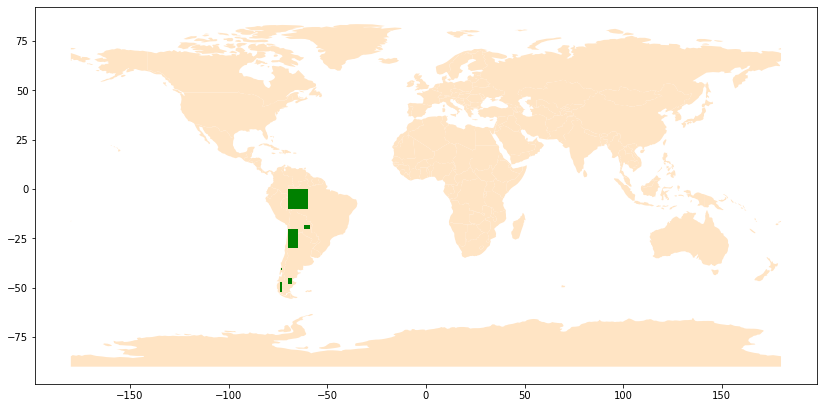

In [3]:
zones_df = gpd.GeoDataFrame(zones,crs="EPSG:4326",columns=["label","geometry"])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1,figsize=(14,7))
world.plot(ax=ax,color='bisque')
zones_df.plot(ax=ax,color='green')

In [4]:
zones_df

,label,geometry
0,Rainforest,"POLYGON ((-70 0, -70 -10, -60 -10, -60 0, -70 0))"
1,Tropical dry forest,"POLYGON ((-62 -18, -62 -20, -59 -20, -59 -18, ..."
2,Temperate forest (broadleaf),"POLYGON ((-73.5 -40, -73.5 -41, -72.8 -41, -72..."
3,Savannah,"POLYGON ((-70 -5, -70 -7, -68 -7, -68 -5, -70 ..."
4,Deserts,"POLYGON ((-70 -20, -70 -30, -65 -30, -65 -20, ..."
5,Dry steppe,"POLYGON ((-70 -45, -70 -48, -68 -48, -68 -45, ..."
6,Ice sheets,"POLYGON ((-74 -47, -74 -52, -73 -52, -73 -47, ..."


## Getting time series per zone

We will now retrieve the PROBA-V NDVI for each zone, and plot the resulting timeseries.
This should allow you to answer some questions.


In [5]:
session = openeo.connect("https://openeo.vito.be/openeo/0.4.0")

collection = session.imagecollection("PROBAV_L3_S10_TOC_NDVI_333M")

%time ts_json = collection.polygonal_mean_timeseries(GeometryCollection(list(zones_df.geometry))).execute()

CPU times: user 11.9 ms, sys: 6.96 ms, total: 18.9 ms
Wall time: 3min 34s


In [6]:
from openeo.rest.conversions import timeseries_json_to_pandas
import json
with open('timeseries.json', 'r') as f:
    ts_dict = json.load(f)
df = timeseries_json_to_pandas(ts_dict).dropna()

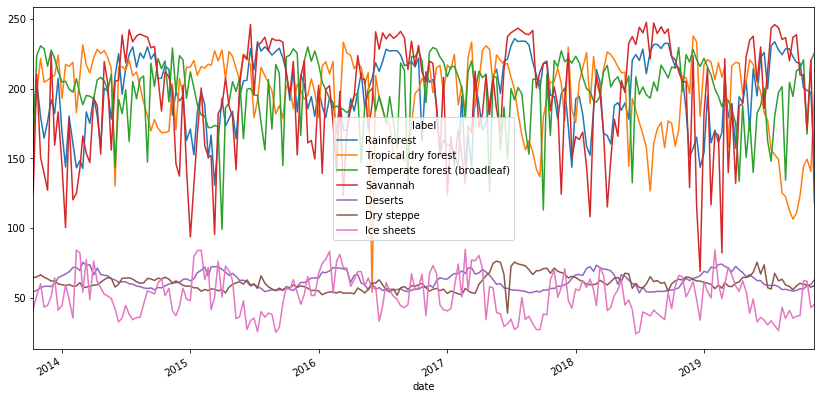

In [7]:
df.index = pd.to_datetime(df.index)
df.columns = zones_df.label
df.plot(figsize=(14,7))

1.	Describe the variation of NDVI over the year for the selected bio-zones.

2.	Compare the results with the description of the bio-zones in the background articles. Are the results of your work as expected?

3.	Can you explain the seasonal variations? 